In [ ]:
from IPython.display import display
from PIL import Image
import cv2

from sklearn.cluster import KMeans
from skimage import io, color, exposure
from skimage.feature import hog
# from kymatio.keras import Scattering2D
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Lambda
import tensorflow.keras.backend as K

from kymatio import Scattering2D
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
pip install kymatio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
def compute_scattering_transform(image_path, J=2, L=8):
    """
    Compute the scattering transform for an image.
    :param image_path: Path to the image file.
    :param J: Scale of the scattering transform.
    :param L: Number of angles for wavelets.
    :return: Scattering coefficients.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (200, 200))
    if image is None:
      print(f"Error: Unable to load image from path {image_path}")
    img_float = image.astype(np.float32)
    # print(image2)
    print(image.shape)

    scattering = Scattering2D(J=2, L = 6, shape=(200, 200))
    # Compute scattering coefficients
    scattering_coeffs = scattering(img_float)
    return scattering_coeffs

# Example usage
path = '/content/01_L.bmp'
scattering_coeffs = compute_scattering_transform(path)

(200, 200)


In [ ]:
print(scattering_coeffs)

[[[2.26612564e+02 2.23045288e+02 2.22750565e+02 ... 2.16918930e+02
   2.17789719e+02 2.16100891e+02]
  [2.27827591e+02 2.22879913e+02 2.21252319e+02 ... 2.19289291e+02
   2.23009094e+02 2.15773026e+02]
  [2.26662659e+02 2.19194351e+02 2.21259811e+02 ... 2.28614258e+02
   2.22329544e+02 2.21953537e+02]
  ...
  [1.84012543e+02 1.74270966e+02 1.75804276e+02 ... 2.33998444e+02
   2.34264236e+02 2.34778244e+02]
  [1.90038177e+02 1.76969330e+02 1.78371216e+02 ... 2.29603897e+02
   2.36509293e+02 2.39782623e+02]
  [1.93233658e+02 1.79717972e+02 1.84834106e+02 ... 2.32849899e+02
   2.33404114e+02 2.39175720e+02]]

 [[2.08471322e+00 9.38915968e-01 2.78251231e-01 ... 7.28503942e-01
   1.52049446e+00 9.08447862e-01]
  [2.24534893e+00 1.02644682e+00 7.00387239e-01 ... 1.02629375e+00
   1.86141634e+00 9.46582556e-01]
  [2.28896499e+00 9.72937286e-01 1.90512323e+00 ... 9.82410371e-01
   1.19946456e+00 1.13947809e+00]
  ...
  [5.34852505e+00 1.15079725e+00 3.16612124e-01 ... 9.10004139e-01
   4.63296

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/01_L.bmp"
image = np.array(Image.open(image_path).convert("L"))  # Convert to grayscale


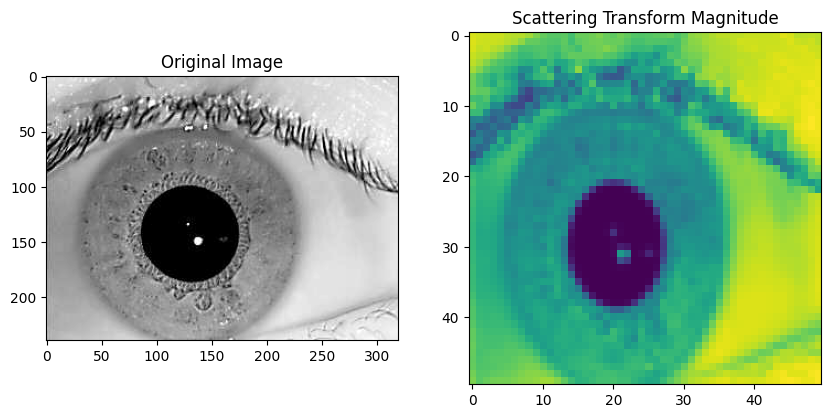

In [ ]:
# Visualize the magnitude of coefficients
magnitude_image = np.abs(scattering_coeffs[0])

# Display the original and transformed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_image, cmap="viridis")
plt.title("Scattering Transform Magnitude")

plt.show()

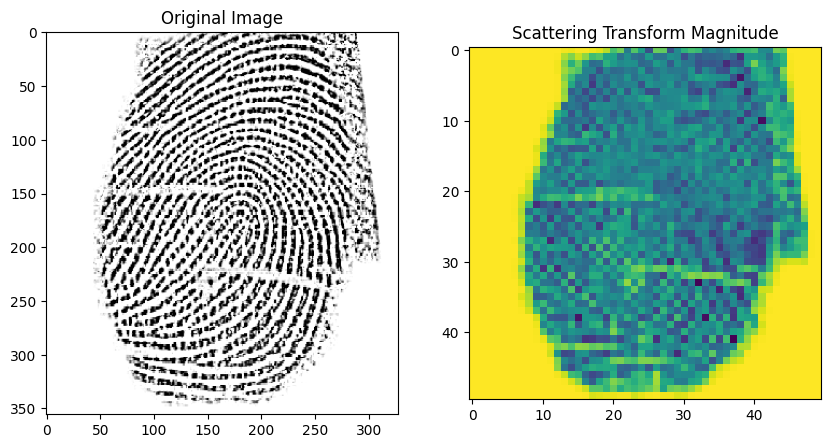

In [ ]:
# Visualize the magnitude of coefficients
magnitude_image = np.abs(scattering_coeffs[0])

# Display the original and transformed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_image, cmap="viridis")
plt.title("Scattering Transform Magnitude")

plt.show()

In [ ]:
from matplotlib import pyplot as plt        # Importing from matplotlib to make histogram plots
import numpy as np                          # Importing Numpy mainly for arrays in this assignment
import cv2                                  # Importing CV2 to use openCV
from google.colab.patches import cv2_imshow # Importing cv2_imshow to show the image
import os
import random
import pandas as pd
import seaborn as sns; sns.set()

# Importing the required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from keras.metrics import Sum
import glob
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

from tensorflow.keras.layers import Layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import backend as K

import torch
import torch.nn as nn
from tensorflow.keras import backend, layers, metrics

from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import Xception, resnet
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import os
import shutil
from sklearn.model_selection import train_test_split
import zipfile

In [ ]:
def compute_scattering_transform(image_path, J, L, height, width, channels):
    """
    Compute the scattering transform for an image.
    :param image_path: Path to the image file.
    :param J: Scale of the scattering transform.
    :param L: Number of angles for wavelets.
    :return: Scattering coefficients.
    """
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (height, width))
    if image is None:
      print(f"Error: Unable to load image from path {image_path}")
    img_float = image.astype(np.float32)
    # print(image.shape)
    print(img_float.shape)

    scattering = Scattering2D(J=2, shape=(height, width, 3))
    # Compute scattering coefficients
    scattering_coeffs = scattering(img_float)
    return scattering_coeffs

# Example usage
path = '/content/green-001.jpg'
scattering_coeffs = compute_scattering_transform(path, 2, 8, 200, 200, 3)


(200, 200, 3)


ValueError: too many values to unpack (expected 2)

In [ ]:
import numpy as np
import pywt

wavelet = 'db2'  # Choose your desired wavelet
J = 2  # Number of scattering layers

image_path = '/content/green-001.jpg'
# Load the image
image = cv2.imread(image_path)
image = cv2.resize(image, (100, 100))
if image is None:
  print(f"Error: Unable to load image from path {image_path}")
img_float = image.astype(np.float32)
# print(image.shape)
print(img_float.shape)
data = img_float

scattering_coeffs = []
for channel in range(data.shape[2]):
    channel_data = data[:, :, channel]
    coeffs = pywt.swt2(channel_data, wavelet, level=J)
    scattering_coeffs.append(coeffs)

print(scattering_coeffs[0][0][0].shape)

combined_coeffs = []
for j in range(J + 1):
    channel_j_coeffs = [coeffs[j] for coeffs in scattering_coeffs]
    combined_level_coeffs = np.stack(channel_j_coeffs, axis=-1)
    combined_coeffs.append(combined_level_coeffs)

# Example: Visualizing scattering coefficients
for i in range(len(combined_coeffs)):
    for j in range(data.shape[2]):
        plt.imshow(combined_coeffs[i][:, :, j], cmap='gray')
        plt.show()

(100, 100, 3)
(100, 100)


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arrays = [asanyarray(arr) for arr in arrays]


IndexError: list index out of range

In [ ]:
from kymatio.keras import Scattering2D
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

In [ ]:
inputs = Input(shape=(200, 200))

In [ ]:
inputs = Input(shape=(200, 200))
x = Scattering2D(J=1, L=6)(inputs)
x = Conv2D(32, kernel_size=(3, 3))(x)
x = BatchNormalization()(x)
x = Conv2D(32, kernel_size=(3, 3))(x)
x = BatchNormalization()(x)
# x = Conv2D(32, kernel_size=(3, 3))(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(32, kernel_size=(3, 3))(x)
# x = BatchNormalization()(x)
# x = AveragePooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(225)(x)
x = Dropout(0.5)(x)
x = Dense(225, activation='softmax')(x)
x_out = Lambda(lambda y: tf.math.l2_normalize(y, axis=1))(x)
model = Model(inputs, x)

In [ ]:
model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 200, 200)]        0         
                                                                 
 scattering2d_31 (Scatterin  (None, 7, 100, 100)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 5, 98, 32)         28832     
                                                                 
 batch_normalization_60 (Ba  (None, 5, 98, 32)         128       
 tchNormalization)                                               
                                                                 
 conv2d_62 (Conv2D)          (None, 3, 96, 32)         9248      
                                                                 
 batch_normalization_61 (Ba  (None, 3, 96, 32)         128

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def load_data(root_dir, test_size=0.2, image_size=(200, 200)):
    images = []
    labels = []

    # Get the list of class directories
    class_directories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

    for class_dir in class_directories:
        class_path = os.path.join(root_dir, class_dir)

        # Get the list of image filenames in the class directory
        image_files = [f for f in os.listdir(class_path) if f.endswith('.bmp') or f.endswith('.png')]

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)

            # Read and resize the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, image_size)
            images.append(image)

            # Add the label (class) for the image
            labels.append(class_dir)

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Encode labels to numerical values
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Perform train-test split
    x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=test_size, random_state=42)

    return (x_train, y_train), (x_test, y_test), label_encoder.classes_

# Specify the root directory of your dataset
root_dir = '/content/drive/MyDrive/Wavelets_Project/IITD_Database'

# Load the data
(x_train, y_train), (x_test, y_test), classes = load_data(root_dir)

# Display the shape of the loaded data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("Classes:", classes)

x_train shape: (2688, 200, 200)
y_train shape: (2688,)
x_test shape: (672, 200, 200)
y_test shape: (672,)
Classes: ['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' '040' '041' '042' '043' '044' '045' '046' '047' '048'
 '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059' '060'
 '061' '062' '063' '064' '065' '066' '067' '068' '069' '070' '071' '072'
 '073' '074' '075' '076' '077' '078' '079' '080' '081' '082' '083' '084'
 '085' '086' '087' '088' '089' '090' '091' '092' '093' '094' '095' '096'
 '097' '098' '099' '100' '101' '102' '103' '104' '105' '106' '107' '108'
 '109' '110' '111' '112' '113' '114' '115' '116' '117' '118' '119' '120'
 '121' '122' '123' '124' '125' '126' '127' '128' '129' '130' '131' '132'
 '133' '134' '135' '136' '137' '138' '139' '140' '141' '142' '143' '144'
 '145' '1

In [ ]:
model.fit(x_train, y_train, epochs=20,
          batch_size=64, validation_split=0.2)

Epoch 1/20
34/34 [==============================] - 5s 66ms/step - loss: 5.9369 - accuracy: 0.3242 - val_loss: 5.9467 - val_accuracy: 0.3662
Epoch 2/20
34/34 [==============================] - 1s 41ms/step - loss: 2.5794 - accuracy: 0.4977 - val_loss: 2.2238 - val_accuracy: 0.5669
Epoch 3/20
34/34 [==============================] - 1s 42ms/step - loss: 1.1351 - accuracy: 0.7302 - val_loss: 1.5853 - val_accuracy: 0.6691
Epoch 4/20
34/34 [==============================] - 1s 41ms/step - loss: 0.5274 - accuracy: 0.8716 - val_loss: 1.0629 - val_accuracy: 0.8067
Epoch 5/20
34/34 [==============================] - 1s 41ms/step - loss: 0.2454 - accuracy: 0.9326 - val_loss: 0.9136 - val_accuracy: 0.8383
Epoch 6/20
34/34 [==============================] - 1s 38ms/step - loss: 0.1578 - accuracy: 0.9567 - val_loss: 0.9550 - val_accuracy: 0.8253
Epoch 7/20
34/34 [==============================] - 1s 39ms/step - loss: 0.1052 - accuracy: 0.9735 - val_loss: 0.7796 - val_accuracy: 0.8513
Epoch 8/20
34

In [ ]:
model.evaluate(x_test, y_test)

21/21 [==============================] - 0s 18ms/step - loss: 1.1118 - accuracy: 0.8423


[1.1117727756500244, 0.8422619104385376]

Without Convolution - 2 Crore Parameters

In [ ]:
model.fit(x_train, y_train, epochs=20,
          batch_size=64, validation_split=0.2)

Epoch 1/20
34/34 [==============================] - 17s 249ms/step - loss: 878.4857 - accuracy: 0.3116 - val_loss: 280.5312 - val_accuracy: 0.3476
Epoch 2/20
34/34 [==============================] - 4s 127ms/step - loss: 351.7855 - accuracy: 0.3758 - val_loss: 182.0376 - val_accuracy: 0.4517
Epoch 3/20
34/34 [==============================] - 5s 145ms/step - loss: 222.3700 - accuracy: 0.4693 - val_loss: 151.5618 - val_accuracy: 0.5186
Epoch 4/20
34/34 [==============================] - 4s 129ms/step - loss: 172.6779 - accuracy: 0.5340 - val_loss: 122.3380 - val_accuracy: 0.5948
Epoch 5/20
34/34 [==============================] - 5s 143ms/step - loss: 123.5240 - accuracy: 0.6205 - val_loss: 116.0590 - val_accuracy: 0.6617
Epoch 6/20
34/34 [==============================] - 5s 144ms/step - loss: 91.7414 - accuracy: 0.6805 - val_loss: 107.3982 - val_accuracy: 0.6691
Epoch 7/20
34/34 [==============================] - 5s 146ms/step - loss: 90.8908 - accuracy: 0.7042 - val_loss: 95.8872 - v

In [ ]:
model.evaluate(x_test, y_test)


21/21 [==============================] - 1s 53ms/step - loss: 67.9264 - accuracy: 0.8750


[67.92635345458984, 0.875]

Adaptive Thresholding

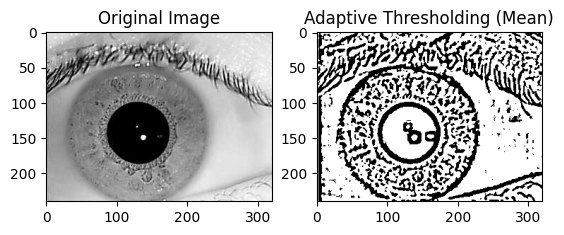

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/01_L.bmp', 0)

# Apply GaussianBlur to reduce noise and enhance the thresholding process
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply adaptive thresholding using the mean of the neighborhood
# You can also use cv2.ADAPTIVE_THRESH_GAUSSIAN_C for Gaussian-weighted mean
thresh_mean = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(thresh_mean, cmap='gray')
plt.title('Adaptive Thresholding (Mean)')

plt.show()

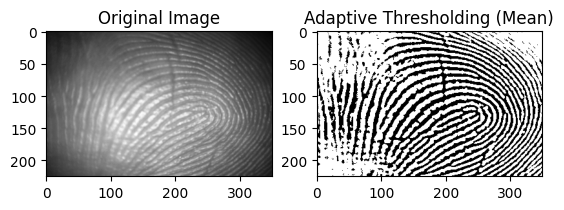

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/p1.bmp', 0)

# Apply GaussianBlur to reduce noise and enhance the thresholding process
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply adaptive thresholding using the mean of the neighborhood
# You can also use cv2.ADAPTIVE_THRESH_GAUSSIAN_C for Gaussian-weighted mean
thresh_mean = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(thresh_mean, cmap='gray')
plt.title('Adaptive Thresholding (Mean)')

plt.show()

Skeletonization

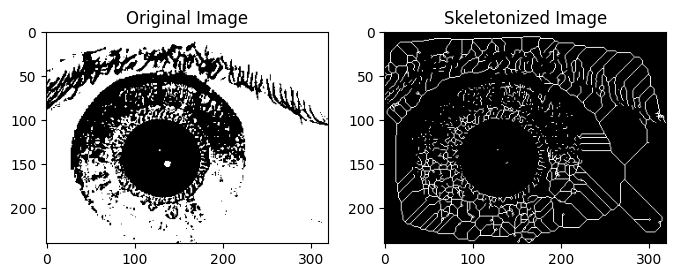

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology

# Load an example binary image
image_path = "/content/01_L.bmp"
image = io.imread(image_path, as_gray=True)

# Binarize the image (if not already binary)
binary_image = image > 0.5

# Perform skeletonization using Zhang-Suen algorithm
skeleton = morphology.skeletonize(binary_image)

# Display the original and skeletonized images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title('Skeletonized Image')

plt.show()

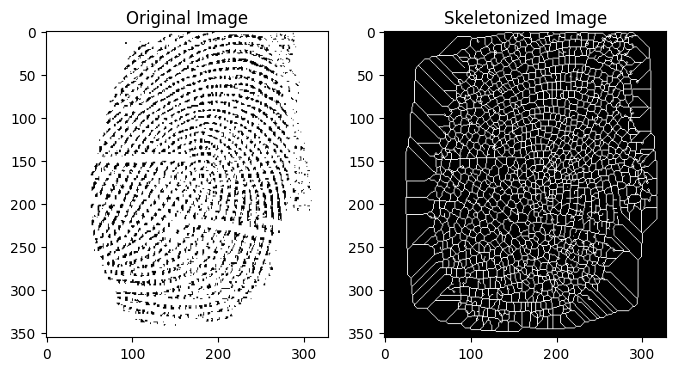

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology

# Load an example binary image
image_path = "/content/1_1.jpg"
image = io.imread(image_path, as_gray=True)

# Binarize the image (if not already binary)
binary_image = image > 0.5

# Perform skeletonization using Zhang-Suen algorithm
skeleton = morphology.skeletonize(binary_image)

# Display the original and skeletonized images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title('Skeletonized Image')

plt.show()

Histogram Equalization

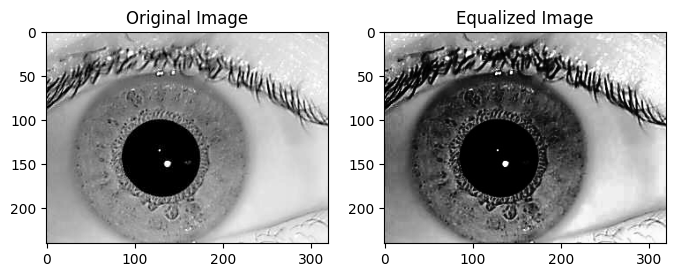

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image_path = "/content/01_L.bmp"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)

# Display the original and equalized images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap="gray")
plt.title("Equalized Image")

plt.show()

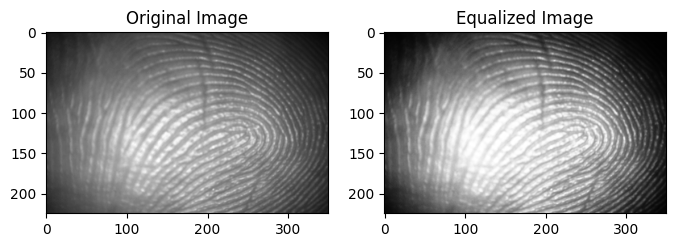

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image_path = "/content/p1.bmp"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)

# Display the original and equalized images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap="gray")
plt.title("Equalized Image")

plt.show()

Gabor Filter

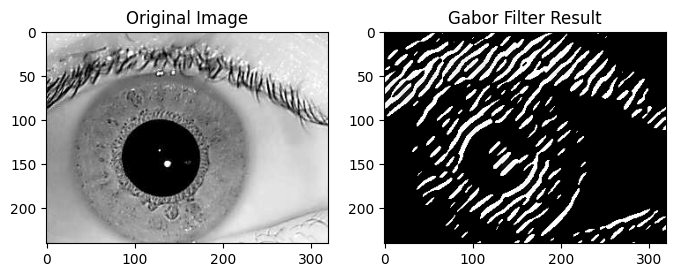

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, filters
from scipy import ndimage

def apply_gabor_filter(image, frequency, theta):
    # Convert the image to grayscale if it's a color image
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Apply the Gabor filter
    gabor_result, _ = filters.gabor(image, frequency=frequency, theta=theta)

    return gabor_result

image_path = "/content/01_L.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Apply Gabor filter with a specific frequency and orientation
frequency = 0.1
theta = np.pi / 4
gabor_result = apply_gabor_filter(image, frequency, theta)

# Display the original and Gabor-filtered images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gabor_result, cmap='gray')
plt.title('Gabor Filter Result')

plt.show()

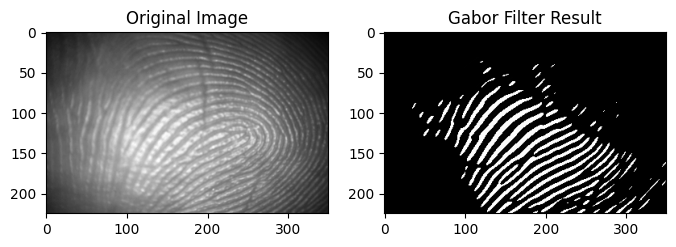

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, filters
from scipy import ndimage

def apply_gabor_filter(image, frequency, theta):
    # Convert the image to grayscale if it's a color image
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Apply the Gabor filter
    gabor_result, _ = filters.gabor(image, frequency=frequency, theta=theta)

    return gabor_result

image_path = "/content/p1.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Apply Gabor filter with a specific frequency and orientation
frequency = 0.1
theta = np.pi / 4
gabor_result = apply_gabor_filter(image, frequency, theta)

# Display the original and Gabor-filtered images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gabor_result, cmap='gray')
plt.title('Gabor Filter Result')

plt.show()

Sobel Operator

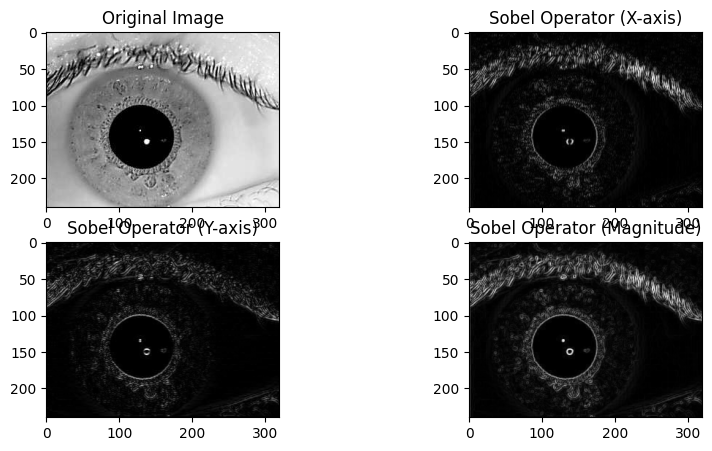

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/01_L.bmp'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the Sobel operator
sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of the gradient
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel Operator (X-axis)')

plt.subplot(2, 2, 3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Operator (Y-axis)')

plt.subplot(2, 2, 4)
plt.imshow(magnitude, cmap='gray')
plt.title('Sobel Operator (Magnitude)')

plt.show()


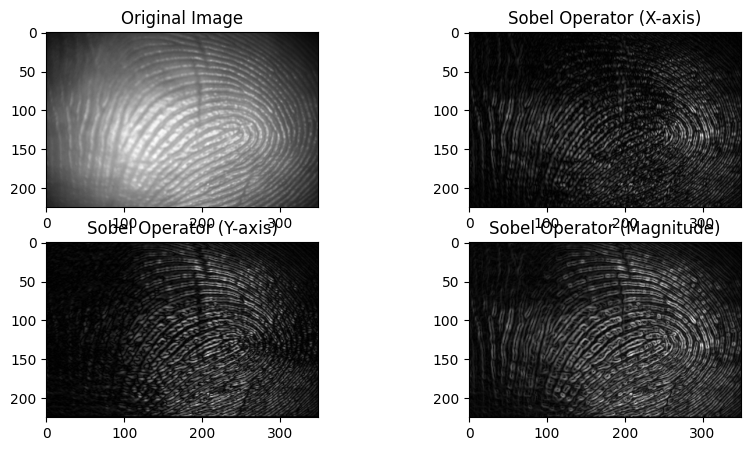

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/p1.bmp'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the Sobel operator
sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of the gradient
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel Operator (X-axis)')

plt.subplot(2, 2, 3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Operator (Y-axis)')

plt.subplot(2, 2, 4)
plt.imshow(magnitude, cmap='gray')
plt.title('Sobel Operator (Magnitude)')

plt.show()


Minutiae Detection

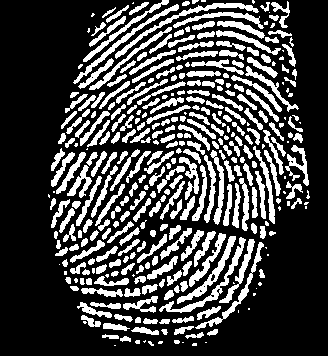

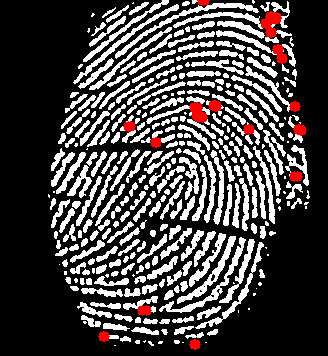

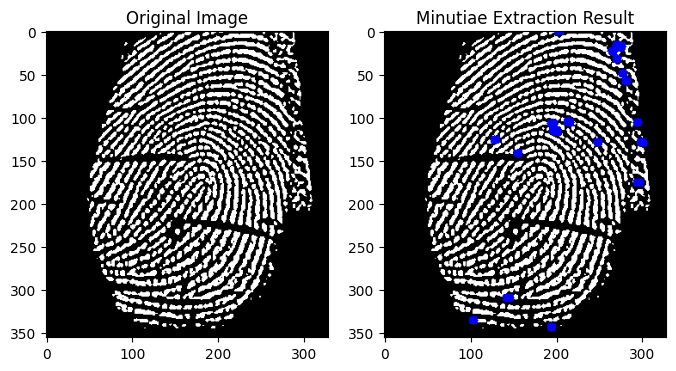

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, filters
from scipy import ndimage

def binarize_image(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, 0)

    # Apply GaussianBlur to the image to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply adaptive thresholding to binarize the image
    _, binarized = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    return binarized

def extract_minutiae(image):
    # Use a morphological operation (thin function) to thin the ridges
    kernel = np.ones((3, 3), np.uint8)
    thin_image = cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel)

    # Find contours in the thinned image
    contours, _ = cv2.findContours(thin_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through contours and identify minutiae points
    minutiae = []
    for contour in contours:
        for i in range(len(contour)):
            x, y = contour[i][0]

            # Filter minutiae based on some criteria (e.g., curvature)
            if some_criteria(x, y, contour):
                minutiae.append((x, y))

    return minutiae

def some_criteria(x, y, contour):
    # Calculate the angle of the ridge at the potential minutiae location
    angle = calculate_angle(x, y, contour)

    # Set a threshold angle to filter minutiae points
    threshold_angle = 30  # You may need to adjust this threshold based on your images

    return angle is not None and angle < threshold_angle

def calculate_angle(x, y, contour):
    # Calculate the angle of the ridge at the potential minutiae location

    if len(contour) < 2:
        return None

    prev_point = contour[0][0]
    next_point = contour[1][0]

    angle = np.arctan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0]) * 180 / np.pi

    return angle


image_path = "/content/1_1.jpg"

# Binarize the fingerprint image
binarized_image = binarize_image(image_path)

# Extract minutiae from the binarized image
minutiae = extract_minutiae(binarized_image)

# Display the result
cv2_imshow(binarized_image)
result_image = cv2.cvtColor(binarized_image, cv2.COLOR_GRAY2BGR)
for point in minutiae:
    cv2.circle(result_image, point, 5, (0, 0, 255), -1)  # Red circle for minutiae points
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Display the original and Gabor-filtered images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(binarized_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Minutiae Extraction Result')

plt.show()

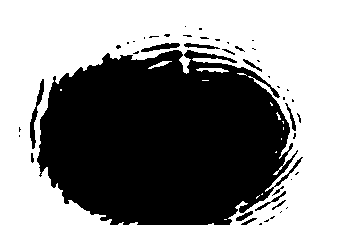

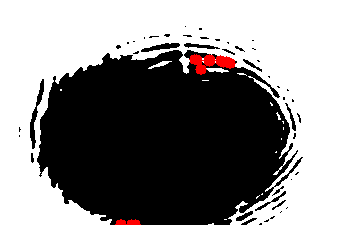

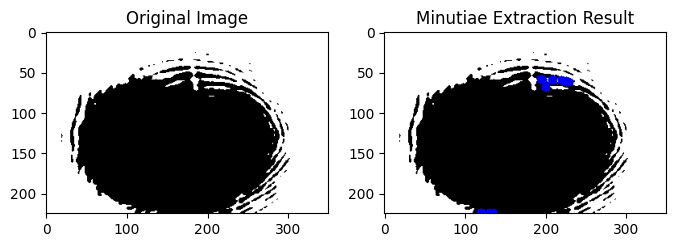

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, filters
from scipy import ndimage

def binarize_image(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, 0)

    # Apply GaussianBlur to the image to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply adaptive thresholding to binarize the image
    _, binarized = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    return binarized

def extract_minutiae(image):
    # Use a morphological operation (thin function) to thin the ridges
    kernel = np.ones((3, 3), np.uint8)
    thin_image = cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel)

    # Find contours in the thinned image
    contours, _ = cv2.findContours(thin_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through contours and identify minutiae points
    minutiae = []
    for contour in contours:
        for i in range(len(contour)):
            x, y = contour[i][0]

            # Filter minutiae based on some criteria (e.g., curvature)
            if some_criteria(x, y, contour):
                minutiae.append((x, y))

    return minutiae

def some_criteria(x, y, contour):
    # Calculate the angle of the ridge at the potential minutiae location
    angle = calculate_angle(x, y, contour)

    # Set a threshold angle to filter minutiae points
    threshold_angle = 30  # You may need to adjust this threshold based on your images

    return angle is not None and angle < threshold_angle

def calculate_angle(x, y, contour):
    # Calculate the angle of the ridge at the potential minutiae location

    if len(contour) < 2:
        return None

    prev_point = contour[0][0]
    next_point = contour[1][0]

    angle = np.arctan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0]) * 180 / np.pi

    return angle


image_path = "/content/p2.bmp"

# Binarize the fingerprint image
binarized_image = binarize_image(image_path)

# Extract minutiae from the binarized image
minutiae = extract_minutiae(binarized_image)

# Display the result
cv2_imshow(binarized_image)
result_image = cv2.cvtColor(binarized_image, cv2.COLOR_GRAY2BGR)
for point in minutiae:
    cv2.circle(result_image, point, 5, (0, 0, 255), -1)  # Red circle for minutiae points
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Display the original and Gabor-filtered images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(binarized_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Minutiae Extraction Result')

plt.show()

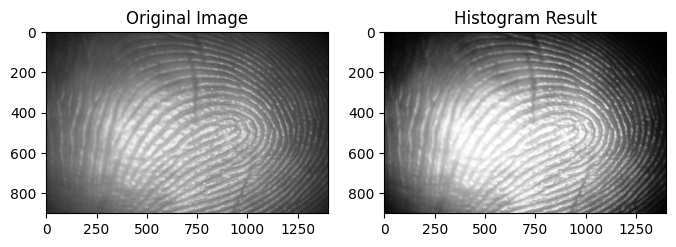

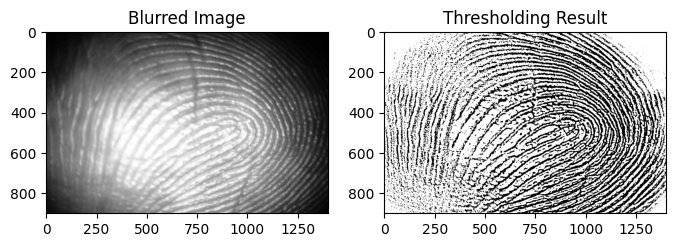

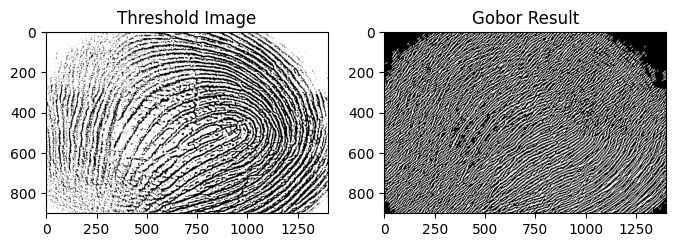

In [ ]:
import cv2
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib import pyplot as plt


import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, filters
from scipy import ndimage

# Load an image
image_path = "/content/p2.bmp"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)


# Display the original and Gabor-filtered images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Result')

plt.show()



# Apply GaussianBlur to reduce noise and enhance the thresholding process
blurred = cv2.GaussianBlur(equalized_img, (5, 5), 0)

# Apply adaptive thresholding using the mean of the neighborhood
# You can also use cv2.ADAPTIVE_THRESH_GAUSSIAN_C for Gaussian-weighted mean
thresh_mean = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)


# Display the original and Gabor-filtered images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')

plt.subplot(1, 2, 2)
plt.imshow(thresh_mean, cmap='gray')
plt.title('Thresholding Result')

plt.show()


def apply_gabor_filter(image, frequency, theta):
    # Convert the image to grayscale if it's a color image
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Apply the Gabor filter
    gabor_result, _ = filters.gabor(image, frequency=frequency, theta=theta)

    return gabor_result

# image_path = "/content/01_L.bmp"
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Apply Gabor filter with a specific frequency and orientation
frequency = 0.1
theta = np.pi / 4
gabor_result = apply_gabor_filter(thresh_mean, frequency, theta)

# Display the original and Gabor-filtered images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(thresh_mean, cmap='gray')
plt.title('Threshold Image')

plt.subplot(1, 2, 2)
plt.imshow(gabor_result, cmap='gray')
plt.title('Gobor Result')

plt.show()